# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **IBRD Credit Scorecard Predictive Engine** |

# II. Notebook Target Definition

This notebook describes the Feature Engineering phase of IBRD Credit Scorecard Predictive Engine Project. Here, we take the cleaned and preprocessed loan data and create new features that can enhance our model's predictive power. By applying techniques such as binning, polynomial feature creation, and interaction term generation, we unlock further insights and potentially improve our model's performance. This step readies our data for the next phase of model building and validation.

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
X_train = pd.read_pickle('../../data/processed/X_train.pkl')
X_test = pd.read_pickle('../../data/processed/X_test.pkl')
y_train = pd.read_pickle('../../data/processed/y_train.pkl')
y_test = pd.read_pickle('../../data/processed/y_test.pkl')

In [3]:
X_train.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
2153,2023-04-30,IBRD18870,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,IN,India,NPL,Fully Repaid,P009768,FARRAKA THERMAL,2.500000e+07,1985-10-01,2000-04-01,1980-07-11,1980-06-26,1980-12-10,1989-06-30,1990-02-01
5370,2023-04-30,IBRD39120,LATIN AMERICA AND CARIBBEAN,MX,Mexico,"NACIONAL FINANCIERA, S.N.C. NAFIN",MX,Mexico,SCL,Fully Repaid,P040462,ESSENTIAL SOCIAL SER,5.000000e+08,1999-04-15,2010-10-15,1995-06-23,1995-06-22,1995-07-06,1998-06-30,1998-07-02
6537,2023-04-30,IBRD70690,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,MINISTERE DES FINANCES,DZ,Algeria,FSL,Fully Repaid,P054217,DZ-FINANCIAL SYSTEM INFRASTR. MODERN.,1.650000e+07,2007-04-15,2017-10-15,2002-01-04,2001-07-26,2002-09-03,2006-06-30,2006-10-11
1014,2023-04-30,IBRD09570,EUROPE AND CENTRAL ASIA,TR,Turkiye,Ministry of Treasury and Finance,TR,Turkiye,NPL,Fully Repaid,P008906,ANTALYA FORESTRY&PAPER M,4.000000e+07,1979-05-01,1989-11-01,1974-01-28,1974-01-15,1976-05-26,1982-06-30,NaT
4831,2023-04-30,IBRD36330,LATIN AMERICA AND CARIBBEAN,BR,Brazil,Ministério da Fazenda,BR,Brazil,CPL,Fully Repaid,P006547,RIO DE JANEIRO METROPOLITAN TRANSPORT,8.102367e+07,1999-03-01,2008-09-01,1993-10-14,1993-06-29,1994-03-14,2000-12-31,2000-12-29


In [4]:
X_test.head()

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,Project ID,Project Name,Original Principal Amount,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
7270,2023-04-30,IBRD78320,LATIN AMERICA AND CARIBBEAN,PE,Peru,Ministerio De Economia Y Finanzas,PE,Peru,FSL,Terminated,P116929,PE Safe and Sustainable Transport,150000000.0,2018-07-15,2031-01-15,NaT,2010-01-14,NaT,2014-07-01,NaT
2085,2023-04-30,IBRD18320,LATIN AMERICA AND CARIBBEAN,CL,Chile,MINISTERIO DE OBRAS PUBLICAS,CL,Chile,NPL,Fully Repaid,P006602,W/S PROJECT,38000000.0,1984-01-01,1995-07-01,1980-08-15,1980-04-17,1980-11-07,1987-06-30,1988-01-08
6585,2023-04-30,IBRD71170,MIDDLE EAST AND NORTH AFRICA,LB,Lebanon,MINISTRY OF FINANCE,LB,Lebanon,FSL,Fully Repaid,P074042,LB - Ba'albeck Water and Wastewater,43530000.0,2009-11-15,2015-05-15,2002-09-26,2002-06-04,2003-07-31,2012-06-15,2013-05-30
6515,2023-04-30,IBRD70470,MIDDLE EAST AND NORTH AFRICA,DZ,Algeria,MINISTERE DES FINANCES,DZ,Algeria,FSL,Fully Repaid,P064921,DZ-Budget System Modernization,23700000.0,2013-04-15,2016-10-15,2001-04-18,2001-02-06,2001-07-17,2009-02-28,2010-10-15
14,2023-04-30,IBRD00112,LATIN AMERICA AND CARIBBEAN,BR,Brazil,Ministério da Fazenda,BR,Brazil,NPL,Fully Repaid,P006214,POWER AND TELEPHONE,15000000.0,1955-07-01,1976-01-01,1951-01-18,1951-01-16,1951-04-10,1954-12-31,NaT


In [5]:
y_train.head()

2153    0
5370    0
6537    0
1014    0
4831    0
Name: bad, dtype: int32

In [6]:
y_test.head()

7270    1
2085    0
6585    0
6515    0
14      0
Name: bad, dtype: int32

# IV. Feature Engineering

## IV.A. Data Shape Inspection

In [7]:
X_train.shape, X_test.shape

((4680, 20), (2006, 20))

In [8]:
y_train.shape, y_test.shape

((4680,), (2006,))

## IV.B. Data Information Inspection

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4680 entries, 2153 to 6611
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 4680 non-null   datetime64[ns]
 1   Loan Number                   4680 non-null   object        
 2   Region                        4680 non-null   object        
 3   Country Code                  4679 non-null   object        
 4   Country                       4680 non-null   object        
 5   Borrower                      4642 non-null   object        
 6   Guarantor Country Code        4490 non-null   object        
 7   Guarantor                     4491 non-null   object        
 8   Loan Type                     4680 non-null   object        
 9   Loan Status                   4680 non-null   object        
 10  Project ID                    4680 non-null   object        
 11  Project Name                  46

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2006 entries, 7270 to 175
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   End of Period                 2006 non-null   datetime64[ns]
 1   Loan Number                   2006 non-null   object        
 2   Region                        2006 non-null   object        
 3   Country Code                  2005 non-null   object        
 4   Country                       2006 non-null   object        
 5   Borrower                      1987 non-null   object        
 6   Guarantor Country Code        1917 non-null   object        
 7   Guarantor                     1918 non-null   object        
 8   Loan Type                     2006 non-null   object        
 9   Loan Status                   2006 non-null   object        
 10  Project ID                    2006 non-null   object        
 11  Project Name                  200

In [11]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 4680 entries, 2153 to 6611
Series name: bad
Non-Null Count  Dtype
--------------  -----
4680 non-null   int32
dtypes: int32(1)
memory usage: 54.8 KB


In [12]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 2006 entries, 7270 to 175
Series name: bad
Non-Null Count  Dtype
--------------  -----
2006 non-null   int32
dtypes: int32(1)
memory usage: 23.5 KB


## IV.C. Unused Feature Removal

In [13]:
def unused_feat_removal(df, feature_to_remove):
    df.drop(columns = feature_to_remove, inplace = True)
    return df

In [14]:
feature_to_remove = ["End of Period", "Loan Number", "Country Code", "Borrower", "Guarantor Country Code", "Loan Status", "Project ID", "Project Name", "First Repayment Date", "Last Repayment Date", "Agreement Signing Date", "Board Approval Date",
                     "Effective Date (Most Recent)", "Closed Date (Most Recent)", "Last Disbursement Date"]

In [15]:
unused_feat_removal(X_train, feature_to_remove)
unused_feat_removal(X_test, feature_to_remove)
X_train.shape, X_test.shape

((4680, 5), (2006, 5))

In [16]:
X_train.head()

,Region,Country,Guarantor,Loan Type,Original Principal Amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


In [17]:
X_test.head()

,Region,Country,Guarantor,Loan Type,Original Principal Amount
7270,LATIN AMERICA AND CARIBBEAN,Peru,Peru,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,Lebanon,Lebanon,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,NPL,15000000.0


## IV.D. Feature Renaming

In [18]:
def feature_rename(df, rename_dict):
    return df.rename(columns = rename_dict)

In [19]:
rename_dict = {"Region": "region",
               "Country": "country",
               "Guarantor": "guarantor",
               "Loan Type": "loan_type",
               "Original Principal Amount": "principal_amount"}

In [20]:
X_train = feature_rename(X_train, rename_dict)
X_test = feature_rename(X_test, rename_dict)
X_train.shape, X_test.shape

((4680, 5), (2006, 5))

In [21]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


In [22]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount
7270,LATIN AMERICA AND CARIBBEAN,Peru,Peru,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,Lebanon,Lebanon,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,NPL,15000000.0


## IV.E. Final Feature Inspection

In [23]:
X_train.shape, X_test.shape

((4680, 5), (2006, 5))

In [24]:
X_train.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


In [25]:
X_test.head()

,region,country,guarantor,loan_type,principal_amount
7270,LATIN AMERICA AND CARIBBEAN,Peru,Peru,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,Chile,Chile,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,Lebanon,Lebanon,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,NPL,15000000.0


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4680 entries, 2153 to 6611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            4680 non-null   object 
 1   country           4680 non-null   object 
 2   guarantor         4491 non-null   object 
 3   loan_type         4680 non-null   object 
 4   principal_amount  4680 non-null   float64
dtypes: float64(1), object(4)
memory usage: 219.4+ KB


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2006 entries, 7270 to 175
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            2006 non-null   object 
 1   country           2006 non-null   object 
 2   guarantor         1918 non-null   object 
 3   loan_type         2006 non-null   object 
 4   principal_amount  2006 non-null   float64
dtypes: float64(1), object(4)
memory usage: 94.0+ KB


# V. Feature Selection

## V.A. Feature Binning

### V.A.1. Feature Weight of Evidence and Information Value Inspection

In [28]:
def woe_analysis(X, feature, y):
    df = pd.concat([X[feature], y], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns[0], "n_observation", "proportion_of_category"]
    df["proportion_of_observation"] = df["n_observation"] / df["n_observation"].sum()
    df["n_good"] = df["proportion_of_category"] * df["n_observation"]
    df["n_bad"] = (1 - df["proportion_of_category"]) * df["n_observation"]
    df["proportion_of_good"] = df["n_good"] / df["n_good"].sum()
    df["proportion_of_bad"] = df["n_bad"] / df["n_bad"].sum()
    df["WoE"] = np.log(df["proportion_of_good"] / df["proportion_of_bad"])
    df = df.sort_values(["WoE"]).reset_index(drop = True)
    df["diff_proportion_of_category"] = df["proportion_of_category"].diff().abs()
    df["diff_WoE"] = df["WoE"].diff().abs()
    df["IV"] = (df["proportion_of_good"] - df["proportion_of_bad"]) * df["WoE"]
    df["IV"] = df["IV"].sum()
    return df

def plot_by_woe(woe_df, rotation_of_x_axis_labels = 0):
    x = np.array(woe_df.iloc[:, 0].astype(str))
    y = woe_df["WoE"]
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(woe_df.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title("Weight of Evidence by " + woe_df.columns[0])
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [29]:
X_binning = X_train.copy()
X_binning.shape

(4680, 5)

In [30]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


#### V.A.1.A. Region

In [31]:
region_woe = woe_analysis(X_binning, "region", y_train)
region_woe

,region,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,WESTERN AND CENTRAL AFRICA,252,0.011905,0.053846,3.0,249.0,0.014151,0.055730,-1.370731,NaN,NaN,0.170192
1,EAST ASIA AND PACIFIC,1015,0.027586,0.216880,28.0,987.0,0.132075,0.220904,-0.514356,0.015681,0.856375,0.170192
2,EASTERN AND SOUTHERN AFRICA,209,0.033493,0.044658,7.0,202.0,0.033019,0.045210,-0.314248,0.005907,0.200108,0.170192
3,MIDDLE EAST AND NORTH AFRICA,553,0.045208,0.118162,25.0,528.0,0.117925,0.118174,-0.002111,0.011715,0.312137,0.170192
4,LATIN AMERICA AND CARIBBEAN,1530,0.049020,0.326923,75.0,1455.0,0.353774,0.325649,0.082837,0.003812,0.084947,0.170192
5,EUROPE AND CENTRAL ASIA,878,0.058087,0.187607,51.0,827.0,0.240566,0.185094,0.262131,0.009067,0.179294,0.170192
6,SOUTH ASIA,243,0.094650,0.051923,23.0,220.0,0.108491,0.049239,0.789977,0.036564,0.527846,0.170192


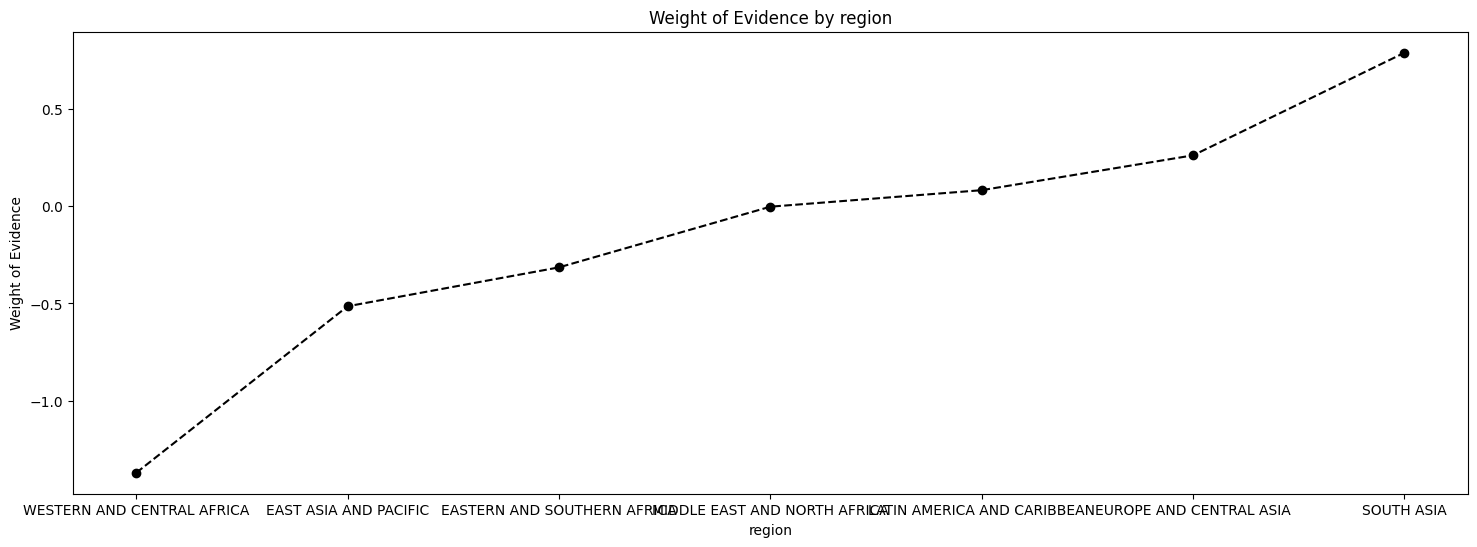

In [32]:
plot_by_woe(region_woe)

In [33]:
def regions_binning(df):
    regions_bin = {"EAST ASIA AND PACIFIC": "EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA",
                   "EASTERN AND SOUTHERN AFRICA": "EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA"}
    df["region"] = df["region"].replace(regions_bin)
    return df

In [34]:
X_binning = regions_binning(X_binning)
X_binning.shape

(4680, 5)

In [35]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,CPL,8.102367e+07


In [36]:
region_woe = woe_analysis(X_binning, "region", y_train)
region_woe

,region,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,WESTERN AND CENTRAL AFRICA,252,0.011905,0.053846,3.0,249.0,0.014151,0.055730,-1.370731,NaN,NaN,0.1689
1,EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN A...,1224,0.028595,0.261538,35.0,1189.0,0.165094,0.266115,-0.477410,0.016690,0.893321,0.1689
2,MIDDLE EAST AND NORTH AFRICA,553,0.045208,0.118162,25.0,528.0,0.117925,0.118174,-0.002111,0.016613,0.475299,0.1689
3,LATIN AMERICA AND CARIBBEAN,1530,0.049020,0.326923,75.0,1455.0,0.353774,0.325649,0.082837,0.003812,0.084947,0.1689
4,EUROPE AND CENTRAL ASIA,878,0.058087,0.187607,51.0,827.0,0.240566,0.185094,0.262131,0.009067,0.179294,0.1689
5,SOUTH ASIA,243,0.094650,0.051923,23.0,220.0,0.108491,0.049239,0.789977,0.036564,0.527846,0.1689


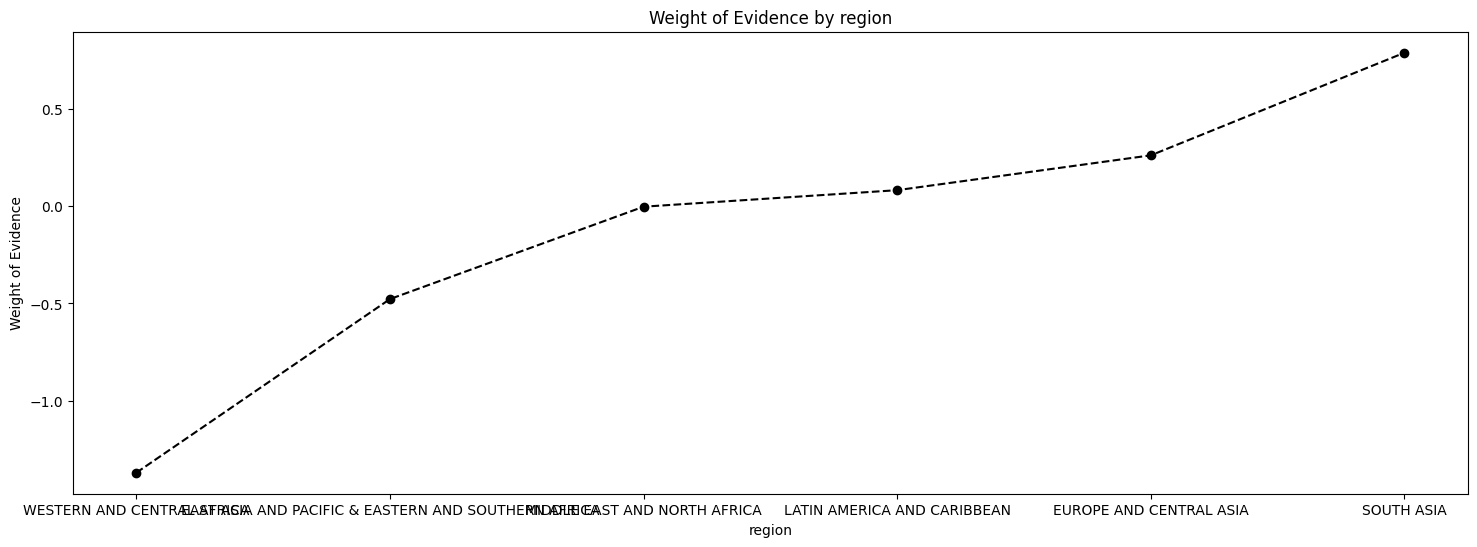

In [37]:
plot_by_woe(region_woe)

#### V.A.1.B. Country

In [38]:
country_woe = woe_analysis(X_binning, "country", y_train)
country_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,Zimbabwe,2,0.000000,0.000427,0.0,2.0,0.000000,0.000448,-inf,NaN,NaN,inf
1,Iceland,8,0.000000,0.001709,0.0,8.0,0.000000,0.001791,-inf,0.000000,NaN,inf
2,Honduras,31,0.000000,0.006624,0.0,31.0,0.000000,0.006938,-inf,0.000000,NaN,inf
3,Haiti,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
4,Guyana,11,0.000000,0.002350,0.0,11.0,0.000000,0.002462,-inf,0.000000,NaN,inf
5,Senegal,14,0.000000,0.002991,0.0,14.0,0.000000,0.003133,-inf,0.000000,NaN,inf
6,Seychelles,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
7,Grenada,6,0.000000,0.001282,0.0,6.0,0.000000,0.001343,-inf,0.000000,NaN,inf
8,Greece,14,0.000000,0.002991,0.0,14.0,0.000000,0.003133,-inf,0.000000,NaN,inf
9,Ghana,7,0.000000,0.001496,0.0,7.0,0.000000,0.001567,-inf,0.000000,NaN,inf


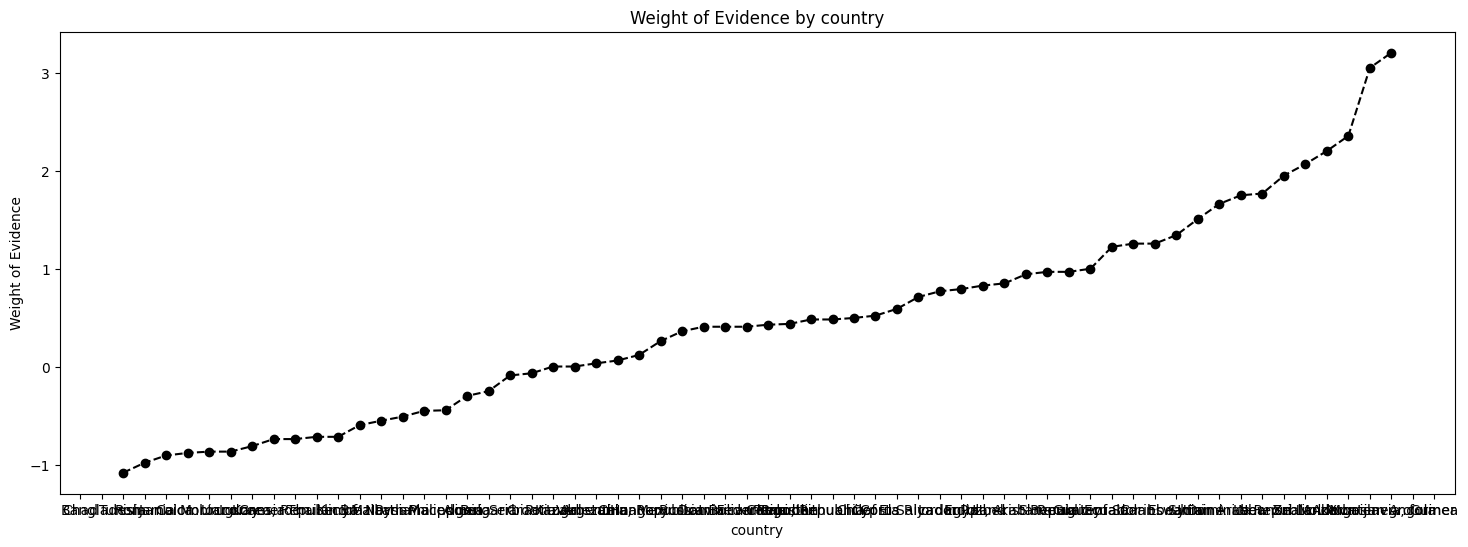

In [39]:
plot_by_woe(country_woe)

#### V.A.1.C. Guarantor

In [40]:
guarantor_woe = woe_analysis(X_binning, "guarantor", y_train)
guarantor_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,guarantor,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,Zambia,17,0.000000,0.003785,0.0,17.0,0.000000,0.003958,-inf,NaN,NaN,inf
1,St. Vincent and the Grenadines,5,0.000000,0.001113,0.0,5.0,0.000000,0.001164,-inf,0.000000,NaN,inf
2,Ethiopia,8,0.000000,0.001781,0.0,8.0,0.000000,0.001863,-inf,0.000000,NaN,inf
3,Fiji,12,0.000000,0.002672,0.0,12.0,0.000000,0.002794,-inf,0.000000,NaN,inf
4,France,4,0.000000,0.000891,0.0,4.0,0.000000,0.000931,-inf,0.000000,NaN,inf
5,Gabon,17,0.000000,0.003785,0.0,17.0,0.000000,0.003958,-inf,0.000000,NaN,inf
6,Papua New Guinea,24,0.000000,0.005344,0.0,24.0,0.000000,0.005588,-inf,0.000000,NaN,inf
7,Grenada,6,0.000000,0.001336,0.0,6.0,0.000000,0.001397,-inf,0.000000,NaN,inf
8,St. Lucia,10,0.000000,0.002227,0.0,10.0,0.000000,0.002328,-inf,0.000000,NaN,inf
9,St. Kitts and Nevis,7,0.000000,0.001559,0.0,7.0,0.000000,0.001630,-inf,0.000000,NaN,inf


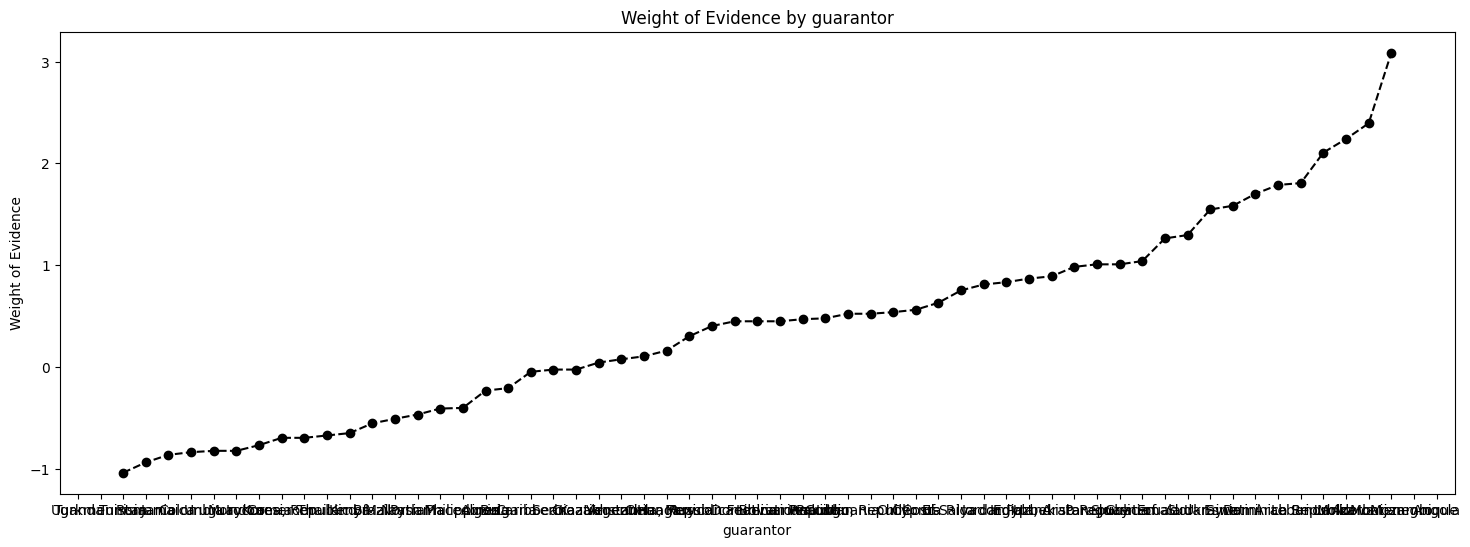

In [41]:
plot_by_woe(guarantor_woe)

#### V.A.1.D. Loan Type

In [42]:
loan_type_woe = woe_analysis(X_binning, "loan_type", y_train)
loan_type_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,loan_type,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,BLNR,11,0.000000,0.002350,0.0,11.0,0.000000,0.002462,-inf,NaN,NaN,inf
1,SCPD,472,0.000000,0.100855,0.0,472.0,0.000000,0.105640,-inf,0.000000,NaN,inf
2,SCPM,113,0.000000,0.024145,0.0,113.0,0.000000,0.025291,-inf,0.000000,NaN,inf
3,SCPY,9,0.000000,0.001923,0.0,9.0,0.000000,0.002014,-inf,0.000000,NaN,inf
4,NPL,1421,0.021816,0.303632,31.0,1390.0,0.146226,0.311101,-0.754962,0.021816,inf,inf
5,SCL,771,0.041505,0.164744,32.0,739.0,0.150943,0.165398,-0.091452,0.019689,0.663510,inf
6,CPL,1512,0.042328,0.323077,64.0,1448.0,0.301887,0.324082,-0.070946,0.000824,0.020507,inf
7,FSL,333,0.141141,0.071154,47.0,286.0,0.221698,0.064011,1.242266,0.098813,1.313211,inf
8,BLNC,2,1.000000,0.000427,2.0,0.0,0.009434,0.000000,inf,0.858859,inf,inf
9,GUBF,1,1.000000,0.000214,1.0,0.0,0.004717,0.000000,inf,0.000000,NaN,inf


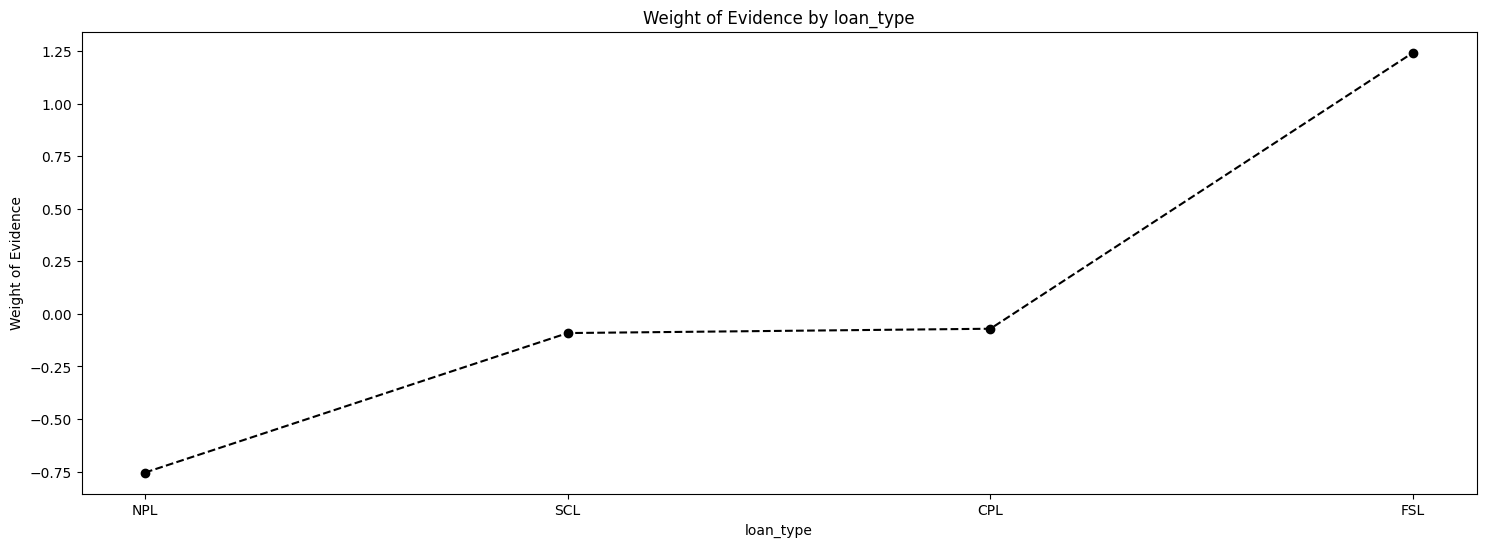

In [43]:
plot_by_woe(loan_type_woe)

In [44]:
def loan_type_binning(df):
    group_a = ["BLNR", "SCPD", "SCPM", "SCPY", "NPL"]
    group_b = ["SCL"]
    group_c = ["CPL"]
    group_d = ["FSL", "BLNC", "GUBF", "GURB"]
    groups = [group_a, group_b, group_c, group_d]
    group_names = ["group_a", "group_b", "group_c", "group_d"]
    loan_type_group_dict = {}
    for group, group_name in zip(groups, group_names):
        for loan_type in group:
            loan_type_group_dict[loan_type] = group_name
    df["loan_type"] = df["loan_type"].map(loan_type_group_dict)
    return df

In [45]:
X_binning = loan_type_binning(X_binning)
X_binning.shape

(4680, 5)

In [46]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,group_a,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,group_b,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,group_d,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,group_a,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,group_c,8.102367e+07


In [47]:
loan_type_woe = woe_analysis(X_binning, "loan_type", y_train)
loan_type_woe

,loan_type,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,group_a,2026,0.015301,0.432906,31.0,1995.0,0.146226,0.446509,-1.116302,NaN,NaN,0.956296
1,group_b,771,0.041505,0.164744,32.0,739.0,0.150943,0.165398,-0.091452,0.026203,1.024850,0.956296
2,group_c,1512,0.042328,0.323077,64.0,1448.0,0.301887,0.324082,-0.070946,0.000824,0.020507,0.956296
3,group_d,371,0.229111,0.079274,85.0,286.0,0.400943,0.064011,1.834769,0.186782,1.905715,0.956296


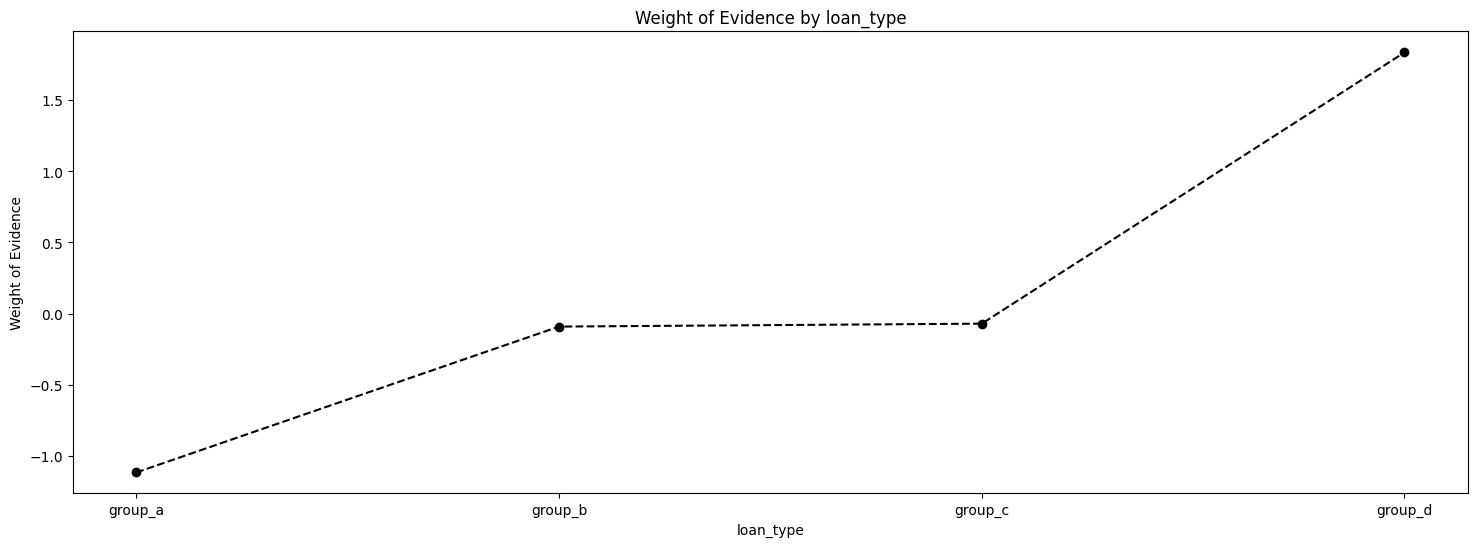

In [48]:
plot_by_woe(loan_type_woe)

#### V.A.1.E. Principal Amount

In [49]:
X_binning["principal_amount_binned"] = pd.cut(X_binning["principal_amount"], 5)
principal_amount_woe = woe_analysis(X_binning, "principal_amount", y_train)
principal_amount_woe

C:\Users\investree\.conda\envs\pacmann\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,principal_amount,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,2.613100e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,NaN,NaN,inf
1,5.142170e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
2,5.137000e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
3,5.136140e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
4,5.100000e+07,7,0.000000,0.001496,0.0,7.0,0.000000,0.001567,-inf,0.000000,NaN,inf
5,5.080209e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
6,5.062500e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
7,5.050821e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
8,5.040500e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf
9,5.039500e+07,1,0.000000,0.000214,0.0,1.0,0.000000,0.000224,-inf,0.000000,NaN,inf


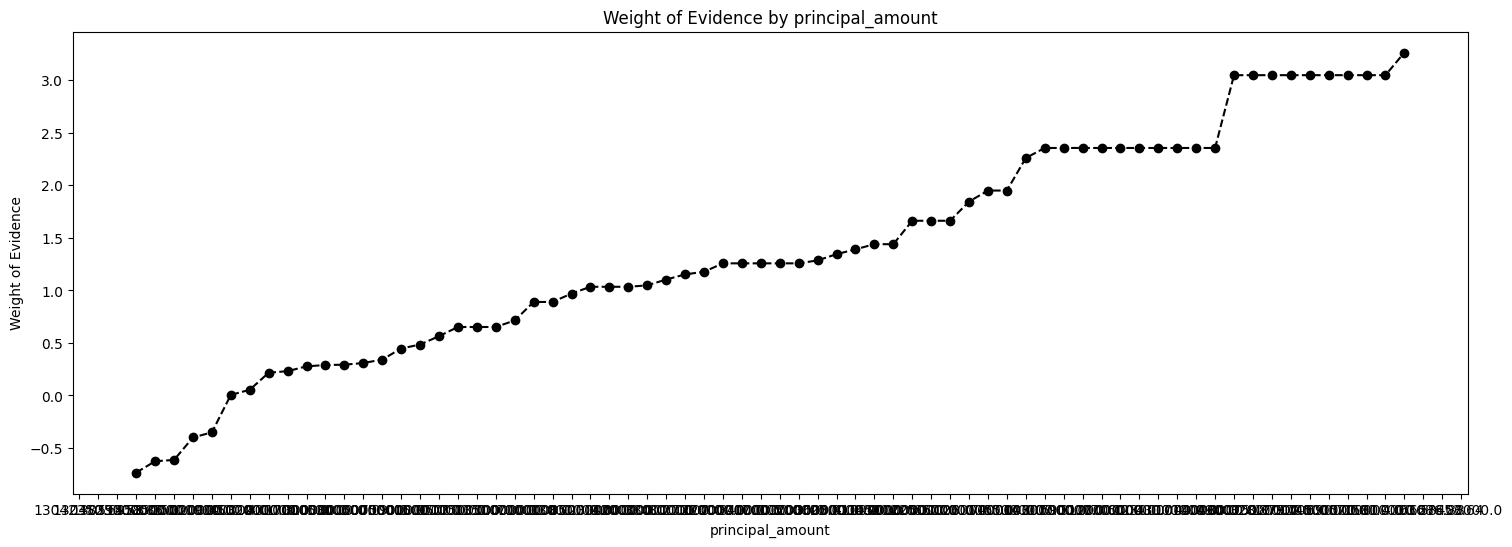

In [50]:
plot_by_woe(principal_amount_woe)

In [51]:
def principal_amount_binning(df):
    bins = [-np.inf, 1978840.31, 23236907.00, 26990400.00, 54947816.00, 249799528.00, np.inf]
    bin_labels = ["(-inf, 1978840.31)", "[1978840.31, 23236907.00)", "[23236907.00, 26990400.00)", "[26990400.00, 54947816.00)", "[54947816.00, 249799528.00)", "[249799528.00, inf)"]
    df["principal_amount"] = pd.cut(df["principal_amount"], bins = bins, labels = bin_labels)
    return df

In [52]:
X_binning = principal_amount_binning(X_binning)
unused_feat_removal(X_binning, "principal_amount_binned")
X_binning.shape

(4680, 5)

In [53]:
X_binning.head()

,region,country,guarantor,loan_type,principal_amount
2153,SOUTH ASIA,India,India,group_a,"[23236907.00, 26990400.00)"
5370,LATIN AMERICA AND CARIBBEAN,Mexico,Mexico,group_b,"[249799528.00, inf)"
6537,MIDDLE EAST AND NORTH AFRICA,Algeria,Algeria,group_d,"[1978840.31, 23236907.00)"
1014,EUROPE AND CENTRAL ASIA,Turkiye,Turkiye,group_a,"[26990400.00, 54947816.00)"
4831,LATIN AMERICA AND CARIBBEAN,Brazil,Brazil,group_c,"[54947816.00, 249799528.00)"


In [54]:
principal_amount_woe = woe_analysis(X_binning, "principal_amount", y_train)
principal_amount_woe

,principal_amount,n_observation,proportion_of_category,proportion_of_observation,n_good,n_bad,proportion_of_good,proportion_of_bad,WoE,diff_proportion_of_category,diff_WoE,IV
0,"[23236907.00, 26990400.00)",234,0.008547,0.050000,2.0,232.0,0.009434,0.051925,-1.705480,NaN,NaN,0.304147
1,"[26990400.00, 54947816.00)",903,0.034330,0.192949,31.0,872.0,0.146226,0.195166,-0.288692,0.025783,1.416788,0.304147
2,"[1978840.31, 23236907.00)",1820,0.037912,0.388889,69.0,1751.0,0.325472,0.391898,-0.185726,0.003582,0.102966,0.304147
3,"[54947816.00, 249799528.00)",1236,0.042880,0.264103,53.0,1183.0,0.250000,0.264772,-0.057407,0.004968,0.128319,0.304147
4,"[249799528.00, inf)",244,0.077869,0.052137,19.0,225.0,0.089623,0.050358,0.576448,0.034989,0.633856,0.304147
5,"(-inf, 1978840.31)",243,0.156379,0.051923,38.0,205.0,0.179245,0.045882,1.362686,0.078510,0.786238,0.304147


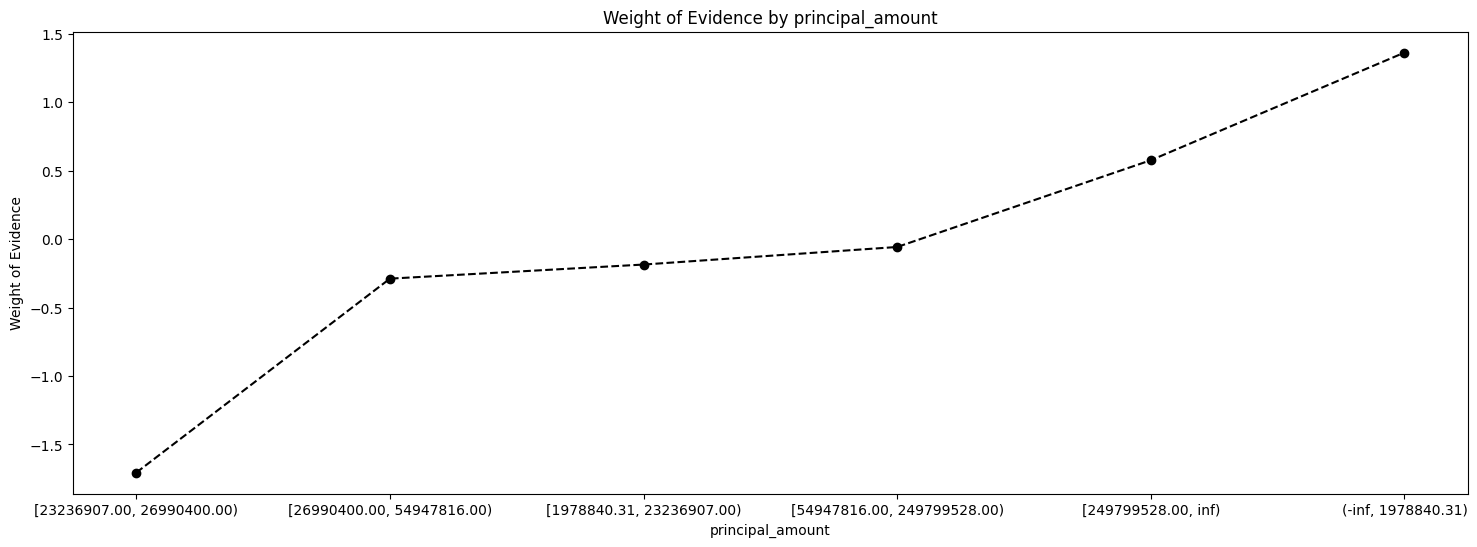

In [55]:
plot_by_woe(principal_amount_woe)

#### V.A.1.F. Unused Feature Removal

In [56]:
feature_to_remove = ["country", "guarantor"]

In [57]:
unused_feat_removal(X_train, feature_to_remove)
unused_feat_removal(X_test, feature_to_remove)
X_train.shape, X_test.shape

((4680, 3), (2006, 3))

In [58]:
X_train.head()

,region,loan_type,principal_amount
2153,SOUTH ASIA,NPL,2.500000e+07
5370,LATIN AMERICA AND CARIBBEAN,SCL,5.000000e+08
6537,MIDDLE EAST AND NORTH AFRICA,FSL,1.650000e+07
1014,EUROPE AND CENTRAL ASIA,NPL,4.000000e+07
4831,LATIN AMERICA AND CARIBBEAN,CPL,8.102367e+07


In [59]:
X_test.head()

,region,loan_type,principal_amount
7270,LATIN AMERICA AND CARIBBEAN,FSL,150000000.0
2085,LATIN AMERICA AND CARIBBEAN,NPL,38000000.0
6585,MIDDLE EAST AND NORTH AFRICA,FSL,43530000.0
6515,MIDDLE EAST AND NORTH AFRICA,FSL,23700000.0
14,LATIN AMERICA AND CARIBBEAN,NPL,15000000.0


In [60]:
X_binning.loan_type.value_counts()

loan_type
group_a    2026
group_c    1512
group_b     771
group_d     371
Name: count, dtype: int64

In [61]:
X_binning.region.value_counts()

region
LATIN AMERICA AND CARIBBEAN                            1530
EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA    1224
EUROPE AND CENTRAL ASIA                                 878
MIDDLE EAST AND NORTH AFRICA                            553
WESTERN AND CENTRAL AFRICA                              252
SOUTH ASIA                                              243
Name: count, dtype: int64

## V.B. Feature Binning One-Hot Encoding

### V.B.1. Categorical Feature Dummy Encoding

In [62]:
X_train = loan_type_binning(X_train)
X_test = loan_type_binning(X_test)
X_train.shape, X_test.shape

((4680, 3), (2006, 3))

In [63]:
X_train = regions_binning(X_train)
X_test = regions_binning(X_test)
X_train.shape, X_test.shape

((4680, 3), (2006, 3))

In [64]:
def dummy_encoding(df, columns_list):
    df_dummies = pd.get_dummies(df[columns_list], prefix = columns_list, prefix_sep = ":")
    df_dummies = df_dummies.astype(int)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

In [65]:
X_train = dummy_encoding(X_train, ["region", "loan_type"])
X_test = dummy_encoding(X_test, ["region", "loan_type"])
X_train.shape, X_test.shape

((4680, 13), (2006, 13))

In [66]:
X_train.head()

,region,loan_type,principal_amount,region:EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA,region:EUROPE AND CENTRAL ASIA,region:LATIN AMERICA AND CARIBBEAN,region:MIDDLE EAST AND NORTH AFRICA,region:SOUTH ASIA,region:WESTERN AND CENTRAL AFRICA,loan_type:group_a,loan_type:group_b,loan_type:group_c,loan_type:group_d
2153,SOUTH ASIA,group_a,2.500000e+07,0,0,0,0,1,0,1,0,0,0
5370,LATIN AMERICA AND CARIBBEAN,group_b,5.000000e+08,0,0,1,0,0,0,0,1,0,0
6537,MIDDLE EAST AND NORTH AFRICA,group_d,1.650000e+07,0,0,0,1,0,0,0,0,0,1
1014,EUROPE AND CENTRAL ASIA,group_a,4.000000e+07,0,1,0,0,0,0,1,0,0,0
4831,LATIN AMERICA AND CARIBBEAN,group_c,8.102367e+07,0,0,1,0,0,0,0,0,1,0


In [67]:
X_test.head()

,region,loan_type,principal_amount,region:EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA,region:EUROPE AND CENTRAL ASIA,region:LATIN AMERICA AND CARIBBEAN,region:MIDDLE EAST AND NORTH AFRICA,region:SOUTH ASIA,region:WESTERN AND CENTRAL AFRICA,loan_type:group_a,loan_type:group_b,loan_type:group_c,loan_type:group_d
7270,LATIN AMERICA AND CARIBBEAN,group_d,150000000.0,0,0,1,0,0,0,0,0,0,1
2085,LATIN AMERICA AND CARIBBEAN,group_a,38000000.0,0,0,1,0,0,0,1,0,0,0
6585,MIDDLE EAST AND NORTH AFRICA,group_d,43530000.0,0,0,0,1,0,0,0,0,0,1
6515,MIDDLE EAST AND NORTH AFRICA,group_d,23700000.0,0,0,0,1,0,0,0,0,0,1
14,LATIN AMERICA AND CARIBBEAN,group_a,15000000.0,0,0,1,0,0,0,1,0,0,0


### V.B.2. Overall Feature One-Hot Encoding

In [68]:
def manual_binning_ohe_encoding(X):
    X_encoded = X.copy()
    original_columns = [column for column in X.columns if ":" not in column]
    X_encoded["region:EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA"] = X.loc[:, "region:EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA"]
    X_encoded["region:EUROPE AND CENTRAL ASIA"] = X.loc[:, "region:EUROPE AND CENTRAL ASIA"]
    X_encoded["region:LATIN AMERICA AND CARIBBEAN"] = X.loc[:, "region:LATIN AMERICA AND CARIBBEAN"]
    X_encoded["region:MIDDLE EAST AND NORTH AFRICA"] = X.loc[:, "region:MIDDLE EAST AND NORTH AFRICA"]
    X_encoded["region:SOUTH ASIA"] = X.loc[:, "region:SOUTH ASIA"]
    X_encoded["region:WESTERN AND CENTRAL AFRICA"] = X.loc[:, "region:WESTERN AND CENTRAL AFRICA"]
    X_encoded["loan_type:group_a"] = X.loc[:, "loan_type:group_a"]
    X_encoded["loan_type:group_b"] = X.loc[:, "loan_type:group_b"]
    X_encoded["loan_type:group_c"] = X.loc[:, "loan_type:group_c"]
    X_encoded["loan_type:group_d"] = X.loc[:, "loan_type:group_d"]
    X_encoded["principal_amount:<=1978840.31"] = np.where((X["principal_amount"] <= 1978840.31), 1, 0)
    X_encoded["principal_amount:1978840.31-23236907.00"] = np.where((X["principal_amount"] > 1978840.31) & (X["principal_amount"] <= 23236907.00), 1, 0)
    X_encoded["principal_amount:23236907.00-26990400.00"] = np.where((X["principal_amount"] > 23236907.00) & (X["principal_amount"] <= 26990400.00), 1, 0)
    X_encoded["principal_amount:26990400.00-54947816.00"] = np.where((X["principal_amount"] > 26990400.00) & (X["principal_amount"] <= 54947816.00), 1, 0)
    X_encoded["principal_amount:54947816.00-249799528.00"] = np.where((X["principal_amount"] > 54947816.00) & (X["principal_amount"] <= 249799528.00), 1, 0)
    X_encoded["principal_amount:>249799528.00"] = np.where((X["principal_amount"] > 249799528.00), 1, 0)
    X_encoded.drop(columns = original_columns, inplace = True)
    return X_encoded

In [69]:
X_train_ohe = manual_binning_ohe_encoding(X_train)
X_test_ohe = manual_binning_ohe_encoding(X_test)
X_train_ohe.shape, X_test_ohe.shape

((4680, 16), (2006, 16))

In [70]:
X_train_ohe.head()

,region:EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA,region:EUROPE AND CENTRAL ASIA,region:LATIN AMERICA AND CARIBBEAN,region:MIDDLE EAST AND NORTH AFRICA,region:SOUTH ASIA,region:WESTERN AND CENTRAL AFRICA,loan_type:group_a,loan_type:group_b,loan_type:group_c,loan_type:group_d,principal_amount:<=1978840.31,principal_amount:1978840.31-23236907.00,principal_amount:23236907.00-26990400.00,principal_amount:26990400.00-54947816.00,principal_amount:54947816.00-249799528.00,principal_amount:>249799528.00
2153,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
5370,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
6537,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
1014,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4831,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [71]:
X_test_ohe.head()

,region:EAST ASIA AND PACIFIC & EASTERN AND SOUTHERN AFRICA,region:EUROPE AND CENTRAL ASIA,region:LATIN AMERICA AND CARIBBEAN,region:MIDDLE EAST AND NORTH AFRICA,region:SOUTH ASIA,region:WESTERN AND CENTRAL AFRICA,loan_type:group_a,loan_type:group_b,loan_type:group_c,loan_type:group_d,principal_amount:<=1978840.31,principal_amount:1978840.31-23236907.00,principal_amount:23236907.00-26990400.00,principal_amount:26990400.00-54947816.00,principal_amount:54947816.00-249799528.00,principal_amount:>249799528.00
7270,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2085,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
6585,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
6515,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
14,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0


## V.C. Export Data

In [72]:
X_train_ohe.to_pickle('../../data/processed/X_train_ohe.pkl')
X_test_ohe.to_pickle('../../data/processed/X_test_ohe.pkl')